In [1]:
#penguin project!

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
from sklearn import linear_model

In [4]:
df = pd.read_json("MLdocs/penguins.json")

In [37]:
g = df.iloc[np.random.permutation(len(df))]
len(df) * .25

penguins_train = g[87:]
penguins_test  = g[:87]

In [8]:
penguins_train.head()

,Species,Island,Beak Length (mm),Beak Depth (mm),Flipper Length (mm),Body Mass (g),Sex
200,Chinstrap,Dream,51.5,18.7,187.0,3250.0,MALE
175,Chinstrap,Dream,50.6,19.4,193.0,3800.0,MALE
112,Adelie,Biscoe,39.7,17.7,193.0,3200.0,FEMALE
332,Gentoo,Biscoe,43.5,15.2,213.0,4650.0,FEMALE
199,Chinstrap,Dream,49.0,19.6,212.0,4300.0,MALE


In [9]:
colors = { "Adelie" : "green", "Gentoo": "blue", "Chinstrap": "red"}

In [40]:
clean = penguins_train[np.isfinite( penguins_train["Beak Length (mm)"]) & 
                        np.isfinite( penguins_train["Beak Depth (mm)"]) &
                        np.isfinite( penguins_train["Flipper Length (mm)"]) & 
                        np.isfinite( penguins_train["Body Mass (g)"])]

In [41]:
clean["SP1"] = clean.Species == "Adelie"
clean["SP2"] = clean.Species == "Gentoo"
clean["SP3"] = clean.Species == "Chinstrap"


/var/folders/ch/zpt836l11k92sr8tpxw3jwsw0000gn/T/ipykernel_15211/3774112163.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean["SP1"] = clean.Species == "Adelie"
/var/folders/ch/zpt836l11k92sr8tpxw3jwsw0000gn/T/ipykernel_15211/3774112163.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean["SP2"] = clean.Species == "Gentoo"
/var/folders/ch/zpt836l11k92sr8tpxw3jwsw0000gn/T/ipykernel_15211/3774112163.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


In [12]:
clean.head()

,Species,Island,Beak Length (mm),Beak Depth (mm),Flipper Length (mm),Body Mass (g),Sex,SP1,SP2,SP3
200,Chinstrap,Dream,51.5,18.7,187.0,3250.0,MALE,False,False,True
175,Chinstrap,Dream,50.6,19.4,193.0,3800.0,MALE,False,False,True
112,Adelie,Biscoe,39.7,17.7,193.0,3200.0,FEMALE,True,False,False
332,Gentoo,Biscoe,43.5,15.2,213.0,4650.0,FEMALE,False,True,False
199,Chinstrap,Dream,49.0,19.6,212.0,4300.0,MALE,False,False,True


In [42]:
X = clean.values[:, 2:6]  # get input values from first two columns
y = clean.values[:, 7:10] 

In [15]:
print(len(X))
print(len(y))

255
255


In [43]:
linear = linear_model.LinearRegression()
linear.fit(X,y)

LinearRegression()

In [44]:
print(linear.coef_)
print(linear.intercept_)

[[-0.0680764   0.09265948 -0.00617767  0.0001293 ]
 [-0.00158128 -0.12360347  0.01070174  0.00018738]
 [ 0.06965768  0.030944   -0.00452406 -0.00031669]]
[ 2.53818933 -0.38521783 -1.15297149]


In [45]:
def abline(slope, intercept, c):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '-', color=c)

In [46]:
avg0 = clean["Beak Length (mm)"].mean()
avg1 = clean["Beak Depth (mm)"].mean()
avg2 = clean["Flipper Length (mm)"].mean()
avg3 = clean["Body Mass (g)"].mean()

In [47]:
newX = clean[["Flipper Length (mm)", "Beak Length (mm)"]].values


In [48]:
b0 = (0.5 - linear.intercept_[0] - linear.coef_[0][1]*avg1 - linear.coef_[0][3]*avg3)/linear.coef_[0][0]
m0 = -linear.coef_[0][2]/linear.coef_[0][0]

b1 = (0.5 - linear.intercept_[1] - linear.coef_[1][1]*avg1 - linear.coef_[1][3]*avg3)/linear.coef_[1][0]
m1 = -linear.coef_[1][2]/linear.coef_[1][0]

b2 = (0.5 - linear.intercept_[2] - linear.coef_[2][1]*avg1 - linear.coef_[2][3]*avg3)/linear.coef_[2][0]
m2 = -linear.coef_[2][2]/linear.coef_[2][0]

In [49]:
print(m1)
print(b1)

6.767771031463397
-1394.3726049341658


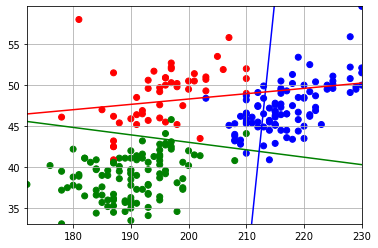

In [51]:
plt.scatter(newX[:,0], newX[:,1], color=clean.Species.map(colors))
abline(m0, b0, 'green')
abline(m1, b1, 'blue')
abline(m2, b2, 'red')
plt.xlim(min(clean["Flipper Length (mm)"].values), max(clean["Flipper Length (mm)"].values))
plt.ylim(min(clean["Beak Length (mm)"].values), max(clean["Beak Length (mm)"].values))

#abline(.25,0)
plt.grid()
plt.show()


In [ ]:
#LOGISTIC

In [52]:
logistic = linear_model.LogisticRegression()

In [53]:
y0 = clean.values[:, 7]*1
y1 = clean.values[:, 8]*1
y2 = clean.values[:, 9]*1
y0=y0.astype('int')
y1=y1.astype('int')
y2=y2.astype('int')

In [65]:
logistic.fit(X,y1)

LogisticRegression()

In [66]:
print(logistic.coef_[0][1])
print(logistic.intercept_)

-1.933868314999956
[-0.03666079]


In [71]:
def findB(x1, x3):
  #return( (-1*math.log((1/.5)-1) - logistic.intercept_ - (logistic.coef_[0][1] * x1) - (logistic.coef_[0][3] * x3))
  #  / logistic.coef_[0][0]
  return( (- logistic.intercept_ - (logistic.coef_[0][1] * x1) - (logistic.coef_[0][3] * x3))
    / logistic.coef_[0][0]
  )

In [72]:
b = []
m = []
for i in range(3):
    y0 = clean.values[:, 7+i]*1
    y0=y0.astype('int')
    logistic.fit(X,y0)
    print(logistic.intercept_)
    print(logistic.coef_)
    b.append(findB(avg1, avg3))
    m.append(-logistic.coef_[0][2]/logistic.coef_[0][0])

[0.05296579]
[[-1.34238542e+00  2.43383154e+00  5.88004563e-02  8.96502937e-04]]
[-0.03666079]
[[-0.01805538 -1.93386831  0.05831486  0.00468147]]
[-0.0222801]
[[ 1.73447443 -0.1790622  -0.22239546 -0.00826777]]


In [73]:
print(b)
print(m)

[array([33.8017915]), array([-736.99728986]), array([21.87279532])]
[0.04380296100513711, 3.22977783497894, 0.1282206629648698]


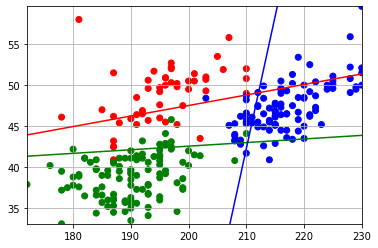

In [95]:
plt.scatter(newX[:,0], newX[:,1], color=clean.Species.map(colors))
abline(m[0], b[0], 'green')
abline(m[1], -636, 'blue')
abline(m[2], b[2], 'red')
plt.xlim(min(clean["Flipper Length (mm)"].values), max(clean["Flipper Length (mm)"].values))
plt.ylim(min(clean["Beak Length (mm)"].values), max(clean["Beak Length (mm)"].values))

#abline(.25,0)
plt.grid()
plt.show()

In [ ]:
#Multivariate normal (was unable to graph correctly)

In [89]:
from sklearn.mixture import GaussianMixture
from scipy import linalg
import itertools
import matplotlib as mpl

In [97]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis 

In [116]:
gm = GaussianMixture(n_components=3,covariance_type="full").fit(X)

In [117]:
print(gm.means_)
gm.get_params([True])

[[  43.68731661   19.15575062  197.00963366 4130.79193994]
 [  47.32989691   14.92061855  216.87628877 5047.42268395]
 [  41.16485873   18.00312483  189.24826382 3493.61612597]]


{'covariance_type': 'full',
 'init_params': 'kmeans',
 'max_iter': 100,
 'means_init': None,
 'n_components': 3,
 'n_init': 1,
 'precisions_init': None,
 'random_state': None,
 'reg_covar': 1e-06,
 'tol': 0.001,
 'verbose': 0,
 'verbose_interval': 10,
 'warm_start': False,
 'weights_init': None}

In [111]:
temp = (clean['SP1'].values + 2*clean['SP2'].values + 3*clean['SP3'].values)-1
print(temp)
newY = pd.Categorical.from_codes(temp, clean['Species'])

#attempt to get QDA to work here

TypeError: only size-1 arrays can be converted to Python scalars

In [99]:
QDA = QuadraticDiscriminantAnalysis()
QDA.fit(X, clean['Species'].values)

##I was unable to finish this part

QuadraticDiscriminantAnalysis()

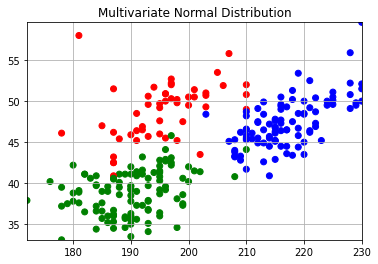

In [127]:
plt.scatter(newX[:,0], newX[:,1], color=clean.Species.map(colors))
plt.xlim(min(clean["Flipper Length (mm)"].values), max(clean["Flipper Length (mm)"].values))
plt.ylim(min(clean["Beak Length (mm)"].values), max(clean["Beak Length (mm)"].values))

plt.title("Multivariate Normal Distribution")
plt.grid()
plt.show()

#ellipses did not end up working



In [ ]:
#Part D

In [130]:
cleanTest = penguins_test[np.isfinite( penguins_test["Beak Length (mm)"]) & 
                        np.isfinite( penguins_test["Beak Depth (mm)"]) &
                        np.isfinite( penguins_test["Flipper Length (mm)"]) & 
                        np.isfinite( penguins_test["Body Mass (g)"])]

X = clean.values[:, 2:6]  # get input values from first two columns
y = clean.values[:, 7:10] 